In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep
import datetime as dt
from time import sleep

In [91]:
randle_data = {}
for year in range(2021, 2025):
    print(year)
    url = f'https://www.basketball-reference.com/players/r/randlju01/gamelog/{year}'
    randle_data[year] = pd.read_html(url)[7]
    randle_data[year] = randle_data[year].drop(columns = ['Unnamed: 5', 'Unnamed: 7'])
    randle_data[year] = randle_data[year].drop(index = [20, 41, 62])

2021
2022
2023
2024


In [94]:
for year in randle_data:
    for column in randle_data[year]:
        randle_data[year][column] = randle_data[year][column].apply(lambda x: np.nan if x == 'Inactive' or x == 'Did Not Dress' else x).copy()
        randle_data[year] = randle_data[year].dropna().copy()
        randle_data[year]['+/-'] = randle_data[year]['+/-'].apply(lambda x: x.replace('+', ''))
    randle_data[year] = randle_data[year].apply(pd.to_numeric, errors='ignore')
for year in randle_data:
    for column in randle_data[year]:
        randle_data[year]['MP'] = pd.to_datetime(randle_data[year]['MP'], format = '%M:%S')

AttributeError: 'int' object has no attribute 'replace'

In [2]:
randle_data[2023].tail(50)

NameError: name 'randle_data' is not defined

In [90]:
randle_data[2024].dtypes

Rk        int64
G         int64
Date     object
Age      object
Tm       object
Opp      object
GS        int64
MP        int64
FG        int64
FGA       int64
FG%     float64
3P        int64
3PA       int64
3P%     float64
FT        int64
FTA       int64
FT%     float64
ORB       int64
DRB       int64
TRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
PTS       int64
GmSc    float64
+/-       int64
dtype: object

### Lets compute Randles averages by year

In [ ]:
randle_avg = pd.DataFrame(columns = )
for year in randle_data:
    randle_data

## Nba vs Western Conference 
### Eastern Teams
- worse:  (Brooklyn, Detroit, Indiana, Miami, Milwaukee, Knicks, Orlando, Toronto, Washington)
- better:  (Chicago) 
- same:  (Boston, Charlotte)
- slightly better:  (Atlanta, Cleveland)
- slightly worse: (76ers, 
### Western Teams
- worse: (Denver, Golden State, Lakers, Memphis, Portland, Utah)
- better: (Houston, Minnesota, Sacramento)
- same: (OKC, Spurs) 
- slightly better: 
- slightly worse: (Dallas, Clippers, New Orleans, Phonix)

### Total results
- 15 total teams were significantly worse against the Western Conference vs the East, with 9 of those teams in the East and 6 in the West
- Only 4 teams are better against the Western Conference by a signiciant margin, being Chicago from the East and Houston, Minneosta and Sacramento from the West
- Boston, Charlotte, OKC, and the Spurs are all the same, with the only notable team being OKC as they don't have an abusrd amount of wins or losses
- Atlanta and cleveland are both slightly better against the West while the 76ers, Dallas, Clippers, New orleans, and Phoenix are all much worse. 
### Next step, lets load in all these datasets and splits and see if anything stands out among the teams that perform better against the West, or also look at teams who maybe should be better based on their splits but are not

In [3]:
worse_teams = ['BRK', 'DET', 'IND', 'MIA', 'MIL', 'NYK', 'ORL', 'TOR', 'WAS', 'DEN', 'GSW', 'LAL', 'MEM', 'POR', 'UTA']
better_teams = ['CHI', 'HOU', 'MIN', 'SAC']
slightly_better_teams = ['ATL', 'CLE']
slightly_worse_teams = ['PHI', 'DAL', 'LAC', 'NOP', 'PHO']
same_teams = ['BOS', 'CHO', 'OKC', 'SAS']

In [4]:
nba_team_list = team_initials = [
    "ATL", "BOS", "BRK", "CHO", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", 
    "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOP", "NYK", 
    "OKC", "ORL", "PHI", "PHO", "POR", "SAC", "SAS", "TOR", "UTA", "WAS"
]
all_splits = []
for team in nba_team_list:
    sleep(5)
    print(team)
    while True:
        try:
            
            variable_name = f"{team.lower()}_splits"
            # Now you can use this variable name to assign the result of pd.read_html()
            splits_data = pd.read_html(f'https://www.basketball-reference.com/teams/{team}/2024/splits/')[0].iloc[32:34, 1:].droplevel(0, axis = 1)
            globals()[variable_name] = splits_data
            all_splits.append(splits_data)
        except Exception as err:
                print(f"caught error {err} on {variable_name}")
                print("sleeping for 5 and trying again")
                sleep(300)
                continue #repeats while loop
        break # leaves loop

merged_splits = pd.concat(all_splits, keys=nba_team_list)

merged_splits.head()
    

ATL
BOS
BRK
CHO
CHI
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOP
NYK
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


Value   G   W   L    FG   FGA    3P   3PA    FT   FTA  ...  STL  \
ATL 32  Eastern  52  22  30  43.0  92.2  13.3  37.1  18.4  23.2  ...  8.0   
    33  Western  30  14  16  43.1  93.0  14.5  38.7  18.8  23.3  ...  7.3   
BOS 32  Eastern  52  41  11  43.8  88.9  16.2  41.6  16.2  20.1  ...  6.4   
    33  Western  30  23   7  44.2  92.5  16.9  43.9  16.3  20.2  ...  6.0   
BRK 32  Eastern  52  24  28  40.8  88.3  13.1  35.8  16.4  21.6  ...  7.3   

        BLK   TOV    PF    PTS   FG%   3P%  eFG%   FT%   TS%  
ATL 32  5.4  13.4  19.7  120.5  .493  .375  .567  .790  .599  
    33  6.1  13.4  19.0  120.5  .499  .399  .581  .795  .613  
BOS 32  3.5  11.3  17.6  110.1  .458  .365  .532  .768  .558  
    33  4.1  11.5  16.6  107.7  .445  .329  .509  .767  .537  
BRK 32  4.7  11.1  18.8  112.9  .466  .368  .540  .805  .574  

[5 rows x 42 columns]

In [5]:
merged_splits = merged_splits.apply(pd.to_numeric, errors = 'ignore')
merged_splits.head()

Value   G   W   L    FG   FGA    3P   3PA    FT   FTA  ...  STL  \
ATL 32  Eastern  52  22  30  43.0  92.2  13.3  37.1  18.4  23.2  ...  8.0   
    33  Western  30  14  16  43.1  93.0  14.5  38.7  18.8  23.3  ...  7.3   
BOS 32  Eastern  52  41  11  43.8  88.9  16.2  41.6  16.2  20.1  ...  6.4   
    33  Western  30  23   7  44.2  92.5  16.9  43.9  16.3  20.2  ...  6.0   
BRK 32  Eastern  52  24  28  40.8  88.3  13.1  35.8  16.4  21.6  ...  7.3   

        BLK   TOV    PF    PTS    FG%    3P%   eFG%    FT%    TS%  
ATL 32  5.4  13.4  19.7  120.5  0.493  0.375  0.567  0.790  0.599  
    33  6.1  13.4  19.0  120.5  0.499  0.399  0.581  0.795  0.613  
BOS 32  3.5  11.3  17.6  110.1  0.458  0.365  0.532  0.768  0.558  
    33  4.1  11.5  16.6  107.7  0.445  0.329  0.509  0.767  0.537  
BRK 32  4.7  11.1  18.8  112.9  0.466  0.368  0.540  0.805  0.574  

[5 rows x 42 columns]

In [6]:
merged_splits['Win%'] = merged_splits['W'] / merged_splits['G']
merged_splits.iloc[:, :]

Value   G   W   L    FG   FGA    3P   3PA    FT   FTA  ...  BLK  \
ATL 32  Eastern  52  22  30  43.0  92.2  13.3  37.1  18.4  23.2  ...  5.4   
    33  Western  30  14  16  43.1  93.0  14.5  38.7  18.8  23.3  ...  6.1   
BOS 32  Eastern  52  41  11  43.8  88.9  16.2  41.6  16.2  20.1  ...  3.5   
    33  Western  30  23   7  44.2  92.5  16.9  43.9  16.3  20.2  ...  4.1   
BRK 32  Eastern  52  24  28  40.8  88.3  13.1  35.8  16.4  21.6  ...  4.7   
    33  Western  30   8  22  40.4  90.4  13.6  38.3  14.7  19.7  ...  5.4   
CHO 32  Eastern  52  14  38  39.6  86.5  11.8  33.9  14.7  18.3  ...  4.5   
    33  Western  30   7  23  40.7  87.9  12.6  34.2  14.1  18.7  ...  5.5   
CHI 32  Eastern  51  22  29  41.5  89.4  10.3  30.5  17.2  22.0  ...  4.8   
    33  Western  31  17  14  43.0  89.6  13.4  34.7  15.8  19.6  ...  5.1   
CLE 32  Eastern  52  31  21  41.9  87.3  13.6  36.7  14.9  19.6  ...  4.7   
    33  Western  30  17  13  41.6  87.0  13.4  36.9  16.7  21.8  ...  5.5   
DAL 32  Eastern  30  19  11  43.9  88.8  14.9  39.7  17.3  23.0  ...  3.4   
    33  Western  52  31  21  42.7  90.2  14.4  39.4  16.9  22.2  ...  4.4   
DEN 32  Eastern  30  24   6  43.8  87.5  11.3  30.3  16.1  20.9  ...  4.4   
    33  Western  52  33  19  44.1  89.5  11.9  31.8  14.6  19.3  ...  5.1   
DET 32  Eastern  51  10  41  40.4  86.9  10.7  31.5  17.7  22.7  ...  5.5   
    33  Western  31   4  27  41.6  90.5  11.6  32.1  15.9  20.0  ...  6.7   
GSW 32  Eastern  30  20  10  44.2  93.2  14.4  39.4  14.5  19.0  ...  4.6   
    33  Western  52  26  26  43.4  90.7  15.0  38.7  16.3  20.7  ...  5.2   
HOU 32  Eastern  30  13  17  43.3  90.1  12.5  34.4  18.7  23.6  ...  5.6   
    33  Western  52  28  24  40.9  91.4  12.9  37.2  17.7  23.2  ...  6.0   
IND 32  Eastern  52  32  20  47.5  93.1  13.5  36.3  16.5  21.1  ...  5.3   
    33  Western  30  15  15  46.2  91.9  12.6  33.4  15.3  19.6  ...  5.5   
LAC 32  Eastern  30  21   9  43.4  86.8  13.1  33.6  18.3  21.7  ...  4.7   
    33  Western  52  30  22  41.8  86.6  12.4  32.9  18.3  22.4  ...  4.7   
LAL 32  Eastern  30  20  10  44.0  88.3  12.0  32.7  18.5  22.9  ...  4.6   
    33  Western  52  27  25  43.5  87.1  11.7  30.6  19.2  24.9  ...  4.8   
MEM 32  Eastern  31  13  18  38.9  87.4  12.8  35.3  14.2  18.3  ...  6.7   
    33  Western  51  14  37  38.0  88.6  13.2  39.3  17.2  22.6  ...  6.5   
MIA 32  Eastern  52  32  20  40.5  86.0  12.7  34.0  18.2  21.9  ...  4.6   
    33  Western  30  14  16  38.7  85.0  12.0  33.2  17.8  22.2  ...  5.0   
MIL 32  Eastern  52  34  18  43.3  87.8  14.0  37.5  19.7  24.9  ...  4.1   
    33  Western  30  15  15  42.9  89.8  14.5  39.1  16.4  22.1  ...  4.4   
MIN 32  Eastern  30  19  11  42.0  87.3  12.8  33.3  16.4  21.6  ...  5.0   
    33  Western  52  37  15  40.8  83.8  12.5  32.3  18.6  23.7  ...  4.3   
NOP 32  Eastern  30  19  11  41.9  86.0  12.5  32.8  18.4  23.0  ...  5.1   
    33  Western  52  30  22  42.8  88.2  12.4  32.5  17.2  22.8  ...  5.2   
NYK 32  Eastern  52  35  17  41.5  88.2  13.7  35.7  16.5  21.3  ...  5.3   
    33  Western  30  15  15  40.8  89.6  12.4  36.0  17.9  22.7  ...  5.3   
OKC 32  Eastern  30  21   9  44.6  88.3  13.7  34.9  17.4  21.6  ...  4.9   
    33  Western  52  36  16  44.5  89.9  13.1  33.8  17.9  21.4  ...  5.2   
ORL 32  Eastern  52  32  20  40.4  84.4  10.5  30.4  18.7  24.4  ...  4.6   
    33  Western  30  15  15  40.6  85.8  11.9  32.8  18.2  24.5  ...  4.7   
PHI 32  Eastern  52  31  21  41.8  89.7  12.4  33.5  18.8  23.0  ...  5.9   
    33  Western  30  16  14  41.1  88.9  11.6  33.0  20.6  24.7  ...  6.5   
PHO 32  Eastern  30  20  10  43.8  86.2  12.2  31.7  17.5  21.8  ...  4.1   
    33  Western  52  29  23  41.7  86.1  12.6  33.1  19.7  24.2  ...  4.8   
POR 32  Eastern  30  13  17  39.1  88.6  10.2  30.1  16.5  20.0  ...  6.4   
    33  Western  52   8  44  39.5  90.3  12.2  35.0  16.1  20.8  ...  6.4   
SAC 32  Eastern  30  16  14  44.1  91.8  15.0  40.0  14.7  20.4  ...  4.6   
    33

In [91]:
merged_splits.columns

Index(['Value', 'G', 'W', 'L', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'eFG%',
       'FT%', 'TS%', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Win%'],
      dtype='object')

In [118]:
merged_splits.columns = [col.replace('%', '_percent') for col in merged_splits.columns]
merged_splits.columns = [col.replace('3', 'three') for col in merged_splits.columns]

merged_splits.columns

Index(['Value', 'G', 'W', 'L', 'FG', 'FGA', 'threeP', 'threePA', 'FT', 'FTA',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG_percent',
       'threeP_percent', 'eFG_percent', 'FT_percent', 'TS_percent', 'FG',
       'FGA', 'threeP', 'threePA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FG_percent', 'threeP_percent',
       'eFG_percent', 'FT_percent', 'TS_percent', 'Win_percent'],
      dtype='object')

In [93]:
# making a model to predict West vs East and see how well it does
# first based on offense

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [9]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [123]:
offense_splits['Value_number'] = np.where(offense_splits['Value'] == 'Eastern', 1, 0)

In [142]:
smf.logit(formula = 'Value_number~W+BLK+TOV+FG_percent', data = offense_splits).fit()

Optimization terminated successfully.
         Current function value: 0.656153
         Iterations 5


In [125]:
offense_splits

Value   G   W   L    FG   FGA  threeP  threePA    FT   FTA  ...  \
ATL 32  Eastern  52  22  30  43.0  92.2    13.3     37.1  18.4  23.2  ...   
    33  Western  30  14  16  43.1  93.0    14.5     38.7  18.8  23.3  ...   
BOS 32  Eastern  52  41  11  43.8  88.9    16.2     41.6  16.2  20.1  ...   
    33  Western  30  23   7  44.2  92.5    16.9     43.9  16.3  20.2  ...   
BRK 32  Eastern  52  24  28  40.8  88.3    13.1     35.8  16.4  21.6  ...   
    33  Western  30   8  22  40.4  90.4    13.6     38.3  14.7  19.7  ...   
CHO 32  Eastern  52  14  38  39.6  86.5    11.8     33.9  14.7  18.3  ...   
    33  Western  30   7  23  40.7  87.9    12.6     34.2  14.1  18.7  ...   
CHI 32  Eastern  51  22  29  41.5  89.4    10.3     30.5  17.2  22.0  ...   
    33  Western  31  17  14  43.0  89.6    13.4     34.7  15.8  19.6  ...   
CLE 32  Eastern  52  31  21  41.9  87.3    13.6     36.7  14.9  19.6  ...   
    33  Western  30  17  13  41.6  87.0    13.4     36.9  16.7  21.8  ...   
DAL 32  Eastern  30  19  11  43.9  88.8    14.9     39.7  17.3  23.0  ...   
    33  Western  52  31  21  42.7  90.2    14.4     39.4  16.9  22.2  ...   
DEN 32  Eastern  30  24   6  43.8  87.5    11.3     30.3  16.1  20.9  ...   
    33  Western  52  33  19  44.1  89.5    11.9     31.8  14.6  19.3  ...   
DET 32  Eastern  51  10  41  40.4  86.9    10.7     31.5  17.7  22.7  ...   
    33  Western  31   4  27  41.6  90.5    11.6     32.1  15.9  20.0  ...   
GSW 32  Eastern  30  20  10  44.2  93.2    14.4     39.4  14.5  19.0  ...   
    33  Western  52  26  26  43.4  90.7    15.0     38.7  16.3  20.7  ...   
HOU 32  Eastern  30  13  17  43.3  90.1    12.5     34.4  18.7  23.6  ...   
    33  Western  52  28  24  40.9  91.4    12.9     37.2  17.7  23.2  ...   
IND 32  Eastern  52  32  20  47.5  93.1    13.5     36.3  16.5  21.1  ...   
    33  Western  30  15  15  46.2  91.9    12.6     33.4  15.3  19.6  ...   
LAC 32  Eastern  30  21   9  43.4  86.8    13.1     33.6  18.3  21.7  ...   
    33  Western  52  30  22  41.8  86.6    12.4     32.9  18.3  22.4  ...   
LAL 32  Eastern  30  20  10  44.0  88.3    12.0     32.7  18.5  22.9  ...   
    33  Western  52  27  25  43.5  87.1    11.7     30.6  19.2  24.9  ...   
MEM 32  Eastern  31  13  18  38.9  87.4    12.8     35.3  14.2  18.3  ...   
    33  Western  51  14  37  38.0  88.6    13.2     39.3  17.2  22.6  ...   
MIA 32  Eastern  52  32  20  40.5  86.0    12.7     34.0  18.2  21.9  ...   
    33  Western  30  14  16  38.7  85.0    12.0     33.2  17.8  22.2  ...   
MIL 32  Eastern  52  34  18  43.3  87.8    14.0     37.5  19.7  24.9  ...   
    33  Western  30  15  15  42.9  89.8    14.5     39.1  16.4  22.1  ...   
MIN 32  Eastern  30  19  11  42.0  87.3    12.8     33.3  16.4  21.6  ...   
    33  Western  52  37  15  40.8  83.8    12.5     32.3  18.6  23.7  ...   
NOP 32  Eastern  30  19  11  41.9  86.0    12.5     32.8  18.4  23.0  ...   
    33  Western  52  30  22  42.8  88.2    12.4     32.5  17.2  22.8  ...   
NYK 32  Eastern  52  35  17  41.5  88.2    13.7     35.7  16.5  21.3  ...   
    33  Western  30  15  15  40.8  89.6    12.4     36.0  17.9  22.7  ...   
OKC 32  Eastern  30  21   9  44.6  88.3    13.7     34.9  17.4  21.6  ...   
    33  Western  52  36  16  44.5  89.9    13.1     33.8  17.9  21.4  ...   
ORL 32  Eastern  52  32  20  40.4  84.4    10.5     30.4  18.7  24.4  ...   
    33  Western  30  15  15  40.6  85.8    11.9     32.8  18.2  24.5  ...   
PHI 32  Eastern  52  31  21  41.8  89.7    12.4     33.5  18.8  23.0  ...   
    33  Western  30  16  14  41.1  88.9    11.6     33.0  20.6  24.7  ...   
PHO 32  Eastern  30  20  10  43.8  86.2    12.2     31.7  17.5  21.8  ...   
    33  Western  52  29  23  41.7  86.1    12.6     33.1  19.7  24.2  ...   
POR 32  Eastern  30  13  17  39.1  88.6    10.2     30.1  16.5  20.0  ...   
    33  Western  52   8  44  39.5  90.3    12.2     35.0  16.1  20.8  ...   
SAC 32  Eastern  30  16  14  44.1  91.8    15.0     40.0  14.7  20.4  ...   
    33

In [130]:
X = offense_splits.iloc[:, 2:24]
X.dtypes

W                   int64
L                   int64
FG                float64
FGA               float64
threeP            float64
threePA           float64
FT                float64
FTA               float64
ORB               float64
TRB               float64
AST               float64
STL               float64
BLK               float64
TOV               float64
PF                float64
PTS               float64
FG_percent        float64
threeP_percent    float64
eFG_percent       float64
FT_percent        float64
TS_percent        float64
Win_percent       float64
dtype: object

In [134]:
X

W   L    FG   FGA  threeP  threePA    FT   FTA   ORB   TRB  ...  BLK  \
ATL 32  22  30  43.0  92.2    13.3     37.1  18.4  23.2  12.4  44.7  ...  4.5   
    33  14  16  43.1  93.0    14.5     38.7  18.8  23.3  12.6  44.6  ...  4.4   
BOS 32  41  11  43.8  88.9    16.2     41.6  16.2  20.1  10.2  45.4  ...  6.4   
    33  23   7  44.2  92.5    16.9     43.9  16.3  20.2  11.5  48.0  ...  6.9   
BRK 32  24  28  40.8  88.3    13.1     35.8  16.4  21.6  11.5  45.0  ...  5.1   
    33   8  22  40.4  90.4    13.6     38.3  14.7  19.7  11.3  42.5  ...  5.3   
CHO 32  14  38  39.6  86.5    11.8     33.9  14.7  18.3   9.7  41.1  ...  4.2   
    33   7  23  40.7  87.9    12.6     34.2  14.1  18.7   8.7  38.9  ...  5.0   
CHI 32  22  29  41.5  89.4    10.3     30.5  17.2  22.0  11.6  44.8  ...  4.9   
    33  17  14  43.0  89.6    13.4     34.7  15.8  19.6  10.4  42.2  ...  4.6   
CLE 32  31  21  41.9  87.3    13.6     36.7  14.9  19.6   9.7  43.4  ...  4.7   
    33  17  13  41.6  87.0    13.4     36.9  16.7  21.8  10.1  43.1  ...  4.6   
DAL 32  19  11  43.9  88.8    14.9     39.7  17.3  23.0   8.7  43.2  ...  5.1   
    33  31  21  42.7  90.2    14.4     39.4  16.9  22.2  10.3  42.8  ...  4.9   
DEN 32  24   6  43.8  87.5    11.3     30.3  16.1  20.9  10.6  44.6  ...  5.7   
    33  33  19  44.1  89.5    11.9     31.8  14.6  19.3  10.8  44.3  ...  5.5   
DET 32  10  41  40.4  86.9    10.7     31.5  17.7  22.7   9.8  43.5  ...  4.8   
    33   4  27  41.6  90.5    11.6     32.1  15.9  20.0  11.6  43.1  ...  4.5   
GSW 32  20  10  44.2  93.2    14.4     39.4  14.5  19.0  12.8  48.7  ...  5.5   
    33  26  26  43.4  90.7    15.0     38.7  16.3  20.7  11.8  45.6  ...  4.1   
HOU 32  13  17  43.3  90.1    12.5     34.4  18.7  23.6  10.8  44.7  ...  4.6   
    33  28  24  40.9  91.4    12.9     37.2  17.7  23.2  11.8  45.9  ...  4.6   
IND 32  32  20  47.5  93.1    13.5     36.3  16.5  21.1  10.0  41.9  ...  6.1   
    33  15  15  46.2  91.9    12.6     33.4  15.3  19.6  10.3  40.9  ...  5.5   
LAC 32  21   9  43.4  86.8    13.1     33.6  18.3  21.7   9.6  42.3  ...  5.2   
    33  30  22  41.8  86.6    12.4     32.9  18.3  22.4  10.3  43.4  ...  4.9   
LAL 32  20  10  44.0  88.3    12.0     32.7  18.5  22.9   8.0  44.1  ...  6.2   
    33  27  25  43.5  87.1    11.7     30.6  19.2  24.9   8.4  42.5  ...  5.1   
MEM 32  13  18  38.9  87.4    12.8     35.3  14.2  18.3  11.4  43.3  ...  6.5   
    33  14  37  38.0  88.6    13.2     39.3  17.2  22.6  10.7  42.2  ...  5.9   
MIA 32  32  20  40.5  86.0    12.7     34.0  18.2  21.9   9.7  42.5  ...  3.2   
    33  14  16  38.7  85.0    12.0     33.2  17.8  22.2   8.7  42.0  ...  3.9   
MIL 32  34  18  43.3  87.8    14.0     37.5  19.7  24.9   9.5  44.6  ...  5.4   
    33  15  15  42.9  89.8    14.5     39.1  16.4  22.1   9.3  43.5  ...  4.4   
MIN 32  19  11  42.0  87.3    12.8     33.3  16.4  21.6   9.1  43.9  ...  5.5   
    33  37  15  40.8  83.8    12.5     32.3  18.6  23.7   9.6  43.4  ...  6.4   
NOP 32  19  11  41.9  86.0    12.5     32.8  18.4  23.0  10.2  44.5  ...  4.9   
    33  30  22  42.8  88.2    12.4     32.5  17.2  22.8  10.5  43.6  ...  4.4   
NYK 32  35  17  41.5  88.2    13.7     35.7  16.5  21.3  12.2  44.4  ...  4.3   
    33  15  15  40.8  89.6    12.4     36.0  17.9  22.7  13.4  46.4  ...  3.8   
OKC 32  21   9  44.6  88.3    13.7     34.9  17.4  21.6   8.7  41.5  ...  6.5   
    33  36  16  44.5  89.9    13.1     33.8  17.9  21.4   8.8  42.3  ...  6.6   
ORL 32  32  20  40.4  84.4    10.5     30.4  18.7  24.4  10.3  42.0  ...  5.2   
    33  15  15  40.6  85.8    11.9     32.8  18.2  24.5  10.8  42.9  ...  5.1   
PHI 32  31  21  41.8  89.7    12.4     33.5  18.8  23.0  10.5  43.4  ...  5.6   
    33  16  14  41.1  88.9    11.6     33.0  20.6  24.7  12.0  42.1  ...  6.8   
PHO 32  20  10  43.8  86.2    12.2     31.7  17.5  21.8  10.1  44.5  ...  6.4   
    33  29  23  41.7  86.1    12.6     33.1  19.7  24.2  10.1  43.8  ...  5.8   
POR 32  13  17  39.1  88.6    10.2     3

In [135]:
formula = 'Value ~'  + ' + '.join(X.columns)
formula

'Value ~W + L + FG + FGA + threeP + threePA + FT + FTA + ORB + TRB + AST + STL + BLK + TOV + PF + PTS + FG_percent + threeP_percent + eFG_percent + FT_percent + TS_percent + Win_percent'

In [146]:
model = smf.logit(formula = 'Value_number ~  ORB + TRB + AST + STL + BLK + TOV + PF \
+ PTS + FG_percent + threeP_percent + eFG_percent + \
FT_percent + TS_percent + Win_percent', data = offense_splits).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.440306
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Value_number   No. Observations:                   60
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                           14
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                  0.3648
Time:                        19:17:26   Log-Likelihood:                -26.418
converged:                       True   LL-Null:                       -41.589
Covariance Type:            nonrobust   LLR p-value:                  0.006848
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.4366     34.396      0.420      0.675     -52.978      81.852
ORB               -0.5745      0.585     -0.982      0.326      -1.721       0.572
TRB                0.2210      0.408      0.541      0.588      -0.579       1.021
AST               -0.6329      0.361     -1.753      0.080      -1.341       0.075
STL               -2.0124      0.855     -2.355      0.019      -3.687      -0.338
BLK               -0.1238      0.511     -0.242      0.809      -1.126       0.878
TOV                0.4118      0.576      0.715      0.474      -0.716       1.540
PF                 0.0869      0.312      0.279      0.780      -0.524       0.698
PTS                0.0224      0.278      0.081      0.936      -0.523       0.568
FG_percent       196.8918     97.795      2.013      0.044       5.218     388.566
threeP_percent   -49.6603     48.631     -1.021      0.307    -144.975      45.655
eFG_percent      178.2782    197.354      0.903      0.366    -208.528     565.084
FT_percent        37.1306     28.222      1.316      0.188     -18.183      92.444
TS_percent      -345.8354    225.941     -1.531      0.126    -788.672      97.001
Win_percent        8.1255      6.223      1.306      0.192      -4.071      20.322
==================================================================================
"""

In [ ]:
model.predict()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, train_size = .7)

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
Cs = [.0001, .001, .01, .1, 1, 10, 100]
model = LogisticRegressionCV(Cs=Cs, max_iter=100000, cv=2)
model.fit(x_train_scaled, y_train)

LogisticRegressionCV(Cs=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], cv=2,
                     max_iter=100000)

In [75]:
model.C_

array([0.1])

In [76]:
model.predict(x_test_scaled) == y_test

DEN  33    False
POR  33     True
IND  32     True
CHO  33     True
NOP  32     True
TOR  32    False
DET  32     True
IND  33    False
BRK  32     True
ATL  33     True
ORL  33     True
LAC  33    False
MEM  33     True
SAS  33     True
LAL  32     True
BRK  33     True
MEM  32    False
GSW  33    False
Name: Value, dtype: bool

In [11]:
# Make a West and East Dataset
teams_against_west = merged_splits.loc[merged_splits['Value'] == 'Western']
teams_against_east = merged_splits.loc[merged_splits['Value'] == 'Eastern']

In [12]:
teams_vs_west = teams_against_west.droplevel(level = 1)
teams_vs_east = teams_against_east.droplevel(level = 1)

<Axes: xlabel='Value', ylabel='L'>

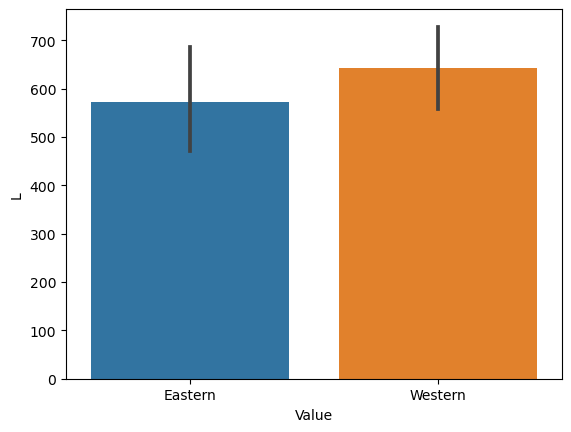

In [9]:
sns.barplot(y = merged_splits['L'], x = merged_splits['Value'], estimator='sum')

<Axes: xlabel='W', ylabel='Value'>

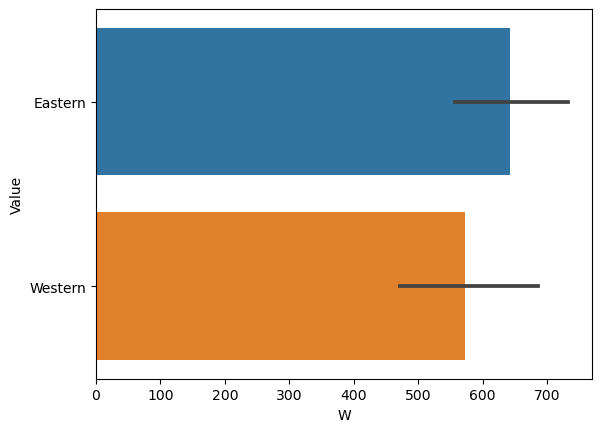

In [10]:
sns.barplot(x = merged_splits['W'], y = merged_splits['Value'], estimator='sum')

<Axes: xlabel='Value', ylabel='3P%'>

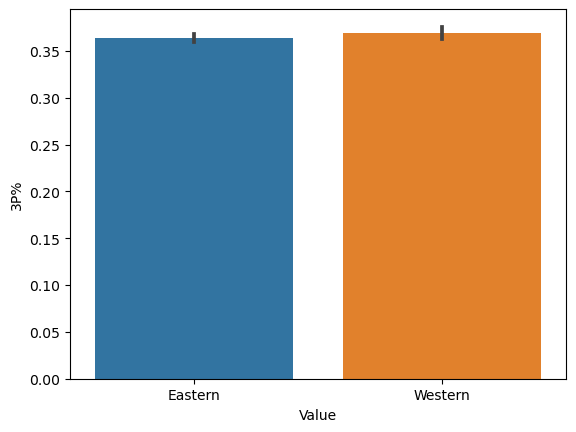

In [22]:
sns.barplot(y = defense_splits['3P%'], x = merged_splits['Value'])

In [119]:
common_columns = merged_splits.columns[:4]
offense_columns = common_columns.append(merged_splits.columns[4:23])
defense_columns = common_columns.append(merged_splits.columns[23:])

offense_splits = merged_splits.iloc[:, :23]
offense_splits['Win_percent'] = merged_splits.iloc[:, -1]
defense_splits = merged_splits.iloc[:, list(range(4)) + list(range(23, len(merged_splits.columns)))]
defense_splits.shape

(60, 24)

In [120]:
offense_splits.shape

(60, 24)

In [121]:
worse_offense = offense_splits.loc[worse_teams]
better_offense = offense_splits.loc[better_teams]
slighlty_better_offense = offense_splits.loc[slightly_better_teams]
slightly_worse_offense = offense_splits.loc[slightly_worse_teams]
same_offense = offense_splits.loc[same_teams]

worse_defense = defense_splits.loc[worse_teams]
better_defense = defense_splits.loc[better_teams]
slighlty_better_defense = defense_splits.loc[slightly_better_teams]
slightly_worse_defense = defense_splits.loc[slightly_worse_teams]
same_defense = defense_splits.loc[same_teams]

In [122]:
worse_offense.iloc[:, 1:].mean() > better_offense.iloc[:, 1:].mean()

G                 False
W                 False
L                  True
FG                False
FGA               False
threeP            False
threePA           False
FT                False
FTA               False
ORB                True
TRB               False
AST                True
STL               False
BLK                True
TOV                True
PF                False
PTS               False
FG_percent        False
threeP_percent    False
eFG_percent       False
FT_percent         True
TS_percent        False
Win_percent       False
dtype: bool

In [99]:
worse_defense.iloc[:, 1:].mean() > better_defense.iloc[:, 1:].mean()

G              False
W              False
L               True
FG              True
FGA             True
3P             False
3PA            False
FT             False
FTA            False
ORB             True
TRB             True
AST             True
STL             True
BLK             True
TOV            False
PF             False
PTS             True
FG_percent      True
3P_percent      True
eFG_percent     True
FT_percent      True
TS_percent      True
Win_percent    False
dtype: bool

In [ ]:
all_tables = []
players = ['Jayson Tatum', 'LeBron James']
# Iterate over the range of years



count = 0
for player in helpful['Player']:
    count += 1
    print(count)
    years_played = helpful.loc[helpful['Player'] == player, 'YOS']
    first_name, *last_name = player.split(' ')
    first_2 = first_name[0:2].lower()
    last_5 = ' '.join(last_name)[:5].lower()
   
    failed = []
    for year in range(2024 - years_played.values[0], 2025):
        sleep(5)
        player_url = f'https://www.basketball-reference.com/players/t/{last_5}{first_2}01/on-off/{year}'
        # Send a GET request to the URL and read the HTML table(s)
        print(player_url)
 
        while True:
            try:
                tables = pd.read_html(player_url)      
                        # Assuming the on-off table is the first table on the page
                on_off_table = tables[0]


                on_off_table.columns = on_off_table.columns.droplevel(level = 0)
                on_off_table['year'] = year
                on_off_table['player_name'] = player
                # Add the table to the list
                all_tables.append(on_off_table)     
            except ImportError:
                failed.append(player_url)
                print(f"Failed on due to bad page {player_url}")
            except Exception as err:
                print(f"caught error {err} on {player_url}")
                print("sleeping for 5 and trying again")
                sleep(300)
                continue #repeats while loop
            break # leaves loop
          


# Concatenate all tables into a single DataFrame
merged_table = pd.concat(all_tables, ignore_index=True)

# Print the extracted table
merged_table